### Example 3.6 Community Detection on Zachary’s Karate Club Data

This example uses Zachary’s Karate Club data (Zachary 1977), which describes social network friendships between 34 members of a karate club at a US university in the 1970s. This is one of the standard publicly available data tables for testing community detection algorithms.It contains 34 nodes and 78 links. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import swat
import sys
sys.path.append(r"../../../../sas-network-analysis/lib/python")
import visualization as vz

In [2]:
HOST = 'rdcgrd113.unx.sas.com' 
PORT =  12776
s = swat.CAS(HOST, PORT)
s.loadActionSet('network')

NOTE: Added action set 'network'.


[actionset]

 'network'

+ Elapsed: 0.00258s, sys: 0.002s, mem: 0.224mb

In [3]:
links = [[0,   9], [0,  10], [0,  14], [0,  15], [0,  16], [0,  19], [0,  20], [0,  21],
         [0,  23], [0,  24], [0,  27], [0,  28], [0,  29], [0,  30], [0,  31], [0,  32],
         [0,  33], [2,   1], [3,   1], [3,   2], [4,   1], [4,   2], [4,   3], [5,   1],
         [6,   1], [7,   1], [7,   5], [7,   6], [8,   1], [8,   2], [8,   3], [8,   4],
         [9,   1], [9,   3], [10,  3], [11,  1], [11,  5], [11,  6], [12,  1], [13,  1],
         [13,  4], [14,  1], [14,  2], [14,  3], [14,  4], [17,  6], [17,  7], [18,  1],
         [18,  2], [20,  1], [20,  2], [22,  1], [22,  2], [26, 24], [26, 25], [28,  3],
         [28, 24], [28, 25], [29,  3], [30, 24], [30, 27], [31,  2], [31,  9], [32,  1],
         [32, 25], [32, 26], [32, 29], [33,  3], [33,  9], [33, 15], [33, 16], [33, 19],
         [33, 21], [33, 23], [33, 24], [33, 30], [33, 31], [33, 32]]
df_e = pd.DataFrame(links, columns = ['from', 'to'])

In [4]:
# upload the table into CAS
s.upload(df_e, casout = {'name':'cas_links', 'replace':True})

NOTE: Cloud Analytic Services made the uploaded file available as table CAS_LINKS in caslib CASUSER(hotohi).
NOTE: The table CAS_LINKS has been created in caslib CASUSER(hotohi) from binary data uploaded to Cloud Analytic Services.


[caslib]

 'CASUSER(hotohi)'

[tableName]

 'CAS_LINKS'

[casTable]

 CASTable('CAS_LINKS', caslib='CASUSER(hotohi)')

+ Elapsed: 0.00485s, user: 0.008s, sys: 0.006s, mem: 33.6mb

In [5]:
s.network.community(
    indexOffset    = 1,
    links          = {"name": "cas_links"},
    outNodes       = {"name": "NodeSetOut", "replace":True},
    outLevel       = {"name": "CommLevelOut", "replace":True},
    outCommunity   = {"name": "CommOut", "replace":True},
    outOverlap     = {"name": "CommOverlapOut", "replace":True},
    outCommLinks   = {"name": "CommLinksOut", "replace":True},
    resolutionList = {1.0, 0.5}
    )

NOTE: The number of nodes in the input graph is 34.
NOTE: The number of links in the input graph is 78.
NOTE: Processing community detection using 1 threads across 1 machines.
NOTE: At resolution=1, the community algorithm found 4 communities with modularity=0.418803.
NOTE: At resolution=0.5, the community algorithm found 2 communities with modularity=0.371795.
NOTE: Processing community detection used 0.00 (cpu: 0.00) seconds.


[ProblemSummary]

 Problem Summary
 
             Name1           Label1       cValue1  nValue1
 0        numNodes  Number of Nodes            34     34.0
 1        numLinks  Number of Links            78     78.0
 2  graphDirection  Graph Direction    Undirected      NaN

[SolutionSummary]

 Solution Summary
 
          Name1           Label1              cValue1   nValue1
 0  problemType     Problem Type  Community Detection       NaN
 1       status  Solution Status                   OK       NaN
 2      cpuTime         CPU Time                 0.00  0.000000
 3     realTime        Real Time                 0.00  0.000185

[solutionStatus]

 'OK'

[solutionStatusCode]

 0

[OutputCasTables]

             casLib            Name Label  Rows  Columns  \
 0  CASUSER(hotohi)      NodeSetOut          34        3   
 1  CASUSER(hotohi)    CommLinksOut           5        5   
 2  CASUSER(hotohi)         CommOut           6        9   
 3  CASUSER(hotohi)    CommLevelOut           2        4   
 4  CASUSER(hotohi)  CommOverlapOut          47        3   
 
                                             casTable  
 0   CASTable('NodeSetOut', caslib='CASUSER(hotohi)')  
 1  CASTable('CommLinksOut', caslib='CASUSER(hotoh...  
 2      CASTable('CommOut', caslib='CASUSER(hotohi)')  
 3  CASTable('CommLevelOut', caslib='CASUSER(hotoh...  
 4  CASTable('CommOverlapOut', caslib='CASUSER(hot...  

+ Elapsed: 0.0039s, user: 0.003s, mem: 8.4mb

In [6]:
s.dataStep.runCode(
    code = '''data casuser.NodeSetOut_labeled;
              set casuser.NodeSetOut;
              label = put(node, 4.);
              run;'''
)
s.CASTable('NodeSetOut_labeled').head(6)

,node,community_1,community_2,label
0,0.0,1.0,1.0,0
1,2.0,2.0,2.0,2
2,3.0,2.0,2.0,3
3,4.0,2.0,2.0,4
4,5.0,3.0,2.0,5
5,6.0,3.0,2.0,6


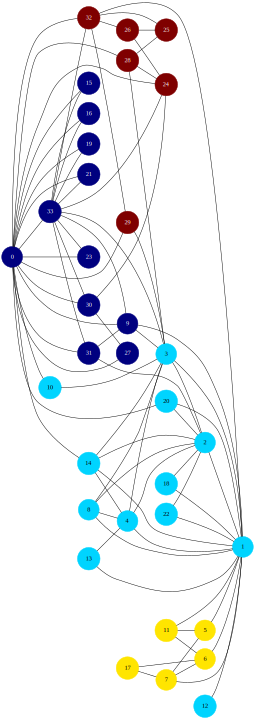

In [7]:
vz.graph2dot(nodesDf    = s.CASTable('NodeSetOut_labeled'),
             linksDf    = s.CASTable('cas_links'), 
             directed   = 0,
             nodesColorBy = 'community_1',
             nodesLabel= "label",
             nodesAttrs = {"colorscheme":"accent4", "style":"filled"},
             stdout=False
            ) 